In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


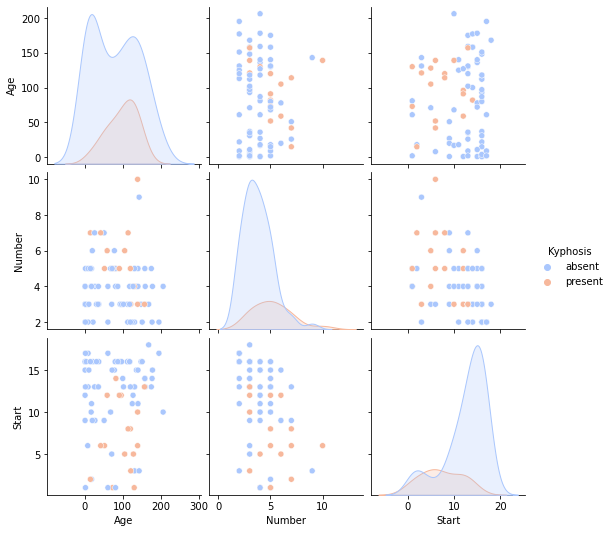

In [13]:
sns.pairplot(df,hue='Kyphosis',palette='coolwarm')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Kyphosis',axis=1)

y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
pred = model.predict(X_test)
pred

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        21
     present       0.33      0.25      0.29         4

    accuracy                           0.80        25
   macro avg       0.60      0.58      0.58        25
weighted avg       0.78      0.80      0.79        25



In [22]:
print(confusion_matrix(y_test,pred))

[[19  2]
 [ 3  1]]


<AxesSubplot:>

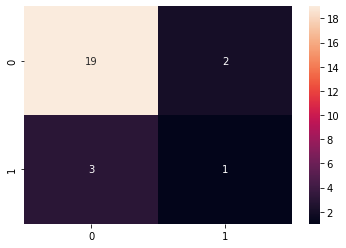

In [23]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [25]:
model.score(X_test,y_test)

0.8

In [26]:
from sklearn.ensemble import RandomForestClassifier

model_ran = RandomForestClassifier(n_estimators=200)

model_ran.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [27]:
pred_ran = model_ran.predict(X_test)

In [28]:
pred_ran

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [29]:
print(classification_report(y_test,pred_ran))

              precision    recall  f1-score   support

      absent       0.88      1.00      0.93        21
     present       1.00      0.25      0.40         4

    accuracy                           0.88        25
   macro avg       0.94      0.62      0.67        25
weighted avg       0.90      0.88      0.85        25



<AxesSubplot:>

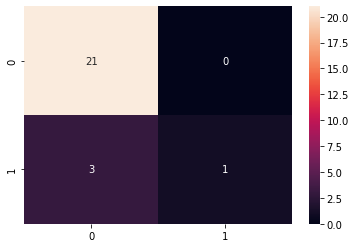

In [30]:
sns.heatmap(confusion_matrix(y_test,pred_ran),annot=True)

In [31]:
model_ran.score(X_test,y_test)

0.88